In [42]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [43]:
import matplotlib.pyplot as plt
#import statsmodels.tsa.seasonal as smt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import datetime as dt
from sklearn import linear_model 

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))
import os
data_path = "/notebooks/stock_data_analysis/data_2/Stocks"
os.chdir(data_path)


In [44]:
data_path

'/notebooks/stock_data_analysis/data_2/Stocks'

In [45]:
#read data
# kernels let us navigate through the zipfile as if it were a directory

# trying to read a file of size zero will throw an error, so skip them
filenames = [x for x in os.listdir(data_path) if x.endswith('.txt') and os.path.getsize(x) > 0]
# = random.sample(filenames,1)
#print(filenames)

In [64]:
col = "Close"

In [65]:
data_close = np.reshape(df[col], (df[col].shape[0], 1))



/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [66]:
scaler = MinMaxScaler()



In [67]:

scaler.fit(data_close)



MinMaxScaler(copy=True, feature_range=(0, 1))

In [68]:
result_get = scaler.transform(data_close)

In [81]:
from sklearn.preprocessing import MinMaxScaler

def data_normalize(df, col):
    data_close = np.reshape(df[col], (df[col].shape[0], 1))
    scaler = MinMaxScaler()
    scaler.fit(data_close)
    result_get = scaler.transform(data_close)
    return result_get, scaler

def binning_data(data, num_embedding = 1000):
    bins = np.linspace(0, 1, num_embedding)
    inds = np.digitize(data, bins)
    return inds


def get_data(file_name):
    file_name = os.path.join('/notebooks/stock_data_analysis/data_2/Stocks', file_name)
    df = pd.read_csv(file_name, sep=',')
    #combine attributes
    #combine high and low by avg
    #combine open and close by avg
    #combine avgHighLow and avgOpenClose
    df['Price'] = (df['High'] + df['Low'] + df['Open'] + df['Close'])/4
    #take log as this flattens the data more, resulting in a better prediction
    df['Price'] = np.log(df['Price'])

    #drop obsolete columns for faster processing
    columns2Drop = [] #['High', 'Low', 'Open', 'Close', 'OpenInt']
    df = df.drop(labels=columns2Drop, axis=1)

    #create new attribute of "movement"
    df['Volume*Price'] = df['Volume'] * df['Price']
    # print(df)

    label = filename
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])
    #conver data to an number so we can fit it to LinearRegression()
#     df['Date'] = df['Date'].map(dt.datetime.toordinal)

    #data.append(df)
    return df

In [82]:
def load_pickle(data_path):
    with open(data_path, 'rb') as handle:
        data_get = pickle.load(handle)
    return data_get

def save_picle(data_path, data):
    with open(data_path, 'wb') as handle:
        pickle.dump(data, handle)



In [83]:
def exists(path):
    """Test whether a path exists.  Returns False for broken symbolic links"""
    try:
        st = os.stat(path)
    except os.error:
        return False
    return True

In [84]:
pathModel = os.getcwd()  #
embedding_col_path = os.path.join(pathModel, "data_get.txt")
stock_transform_path = os.path.join(pathModel, "transform.txt")



In [85]:
filename = filenames[1000]

In [86]:
df = get_data(filename)

In [87]:
df.shape

(3201, 10)

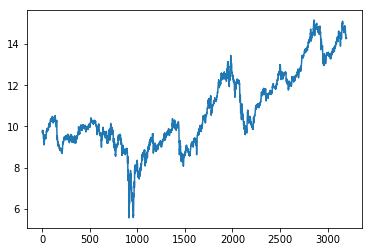

In [88]:
df.Open.plot()

In [73]:
filename.split(".")

['bym', 'us', 'txt']

In [14]:
import tensorflow as tf

In [92]:
flag = exists(embedding_col_path)

In [90]:
import json

In [93]:
if not flag:
    data = []
    print "it works"
    scaler_transform = {}
    for filename in filenames:
        df = get_data(filename)
        stock_name = filename.split(".")[0]
        binning_sentence, scalar_transform = data_normalize(df, 'Close')
        #scaler_transform[stock_name] = scalar_transform
        
        inds = list(binning_data(binning_sentence).flat)
        data.append(inds)
    with open(embedding_col_path, 'w') as f:
        f.write(json.dumps(data))
    #with open(stock_transform_path, 'w') as f:
        #f.write(json.dumps(scaler_transform))
else:
    #Now read the file back into a Python list object
    with open(embedding_col_path, 'r') as f:
        data = json.loads(f.read())  
    
    
    

In [97]:
len(data)

7163

In [98]:
len(data[0])

346

In [99]:


def get_label(data, len_seq = 10):
    y = []
    seq_x = []
    for i in range(0, len(data), len_seq):
        if i-10>=0:
            list_data = data[i-10:i]
            next_data = data[i+1]
            if next_data > data[i]:
                label = 1
            else:
                label = 0
            y.append(label)
            seq_x.append(list_data)
    return seq_x, y
        
    


In [100]:
len(data[0])

346

In [101]:
y = []
seq_x = []
for i in range(len(data)):
    one_x, one_y = get_label(data[i])
    y += one_y
    seq_x += one_x
    

In [102]:
len(seq_x)

243542

In [103]:
len(seq_x)

243542

In [104]:
seq_x[10]

[272, 266, 249, 213, 272, 261, 266, 239, 269, 268]

In [105]:
label = y

In [106]:
hist_y = {}
for item in y:
    if item ==0:
        if item not in hist_y:
            hist_y[item] = 0
        else:
            hist_y[item] +=1
    if item ==1:
        if item not in hist_y:
            hist_y[item] = 0
        else:
            hist_y[item] +=1            


In [107]:
hist_y

{0: 157585, 1: 85955}

In [239]:
def reset_graph():
    if 'sess' in globals() and sess:
        sess.close()
    tf.reset_default_graph()

def build_graph(
    state_size = 64,
    batch_size = 256,
    num_classes = 2):

    reset_graph()

    # Placeholders
    x = tf.placeholder(tf.int32, [None, None], name = "input_seq") # [batch_size, num_steps]
    seqlen = tf.placeholder(tf.int32, [None], name = "input_len")
    y = tf.placeholder(tf.int32, [None], name = "input_target")
    keep_prob = tf.constant(1.0)

    # Embedding layer
#    embeddings = tf.get_variable('embedding_matrix', [vocab_size, state_size])
    
    #embedding_save_path = os.path.join(pathModel, "data.npy")
    embeddings = tf.Variable(tf.random_uniform([1200, 64], -1.0, 1.0), name = "product_vec")


    #data_get = np.load(embedding_save_path)
    #embeddings = tf.Variable(data_get)
    rnn_inputs = tf.nn.embedding_lookup(embeddings, x, name = "input_rnn")
    # RNN
    cell = tf.nn.rnn_cell.GRUCell(state_size)
    init_state = tf.get_variable('init_state', [1, state_size],
                                 initializer=tf.constant_initializer(0.0))
    init_state = tf.tile(init_state, [batch_size, 1])
    rnn_outputs, final_state = tf.nn.dynamic_rnn(cell, rnn_inputs, sequence_length=seqlen,
                                                 initial_state=init_state)

    # Add dropout, as the model otherwise quickly overfits
    rnn_outputs = tf.nn.dropout(rnn_outputs, keep_prob)

    """
    Obtain the last relevant output. The best approach in the future will be to use:

        last_rnn_output = tf.gather_nd(rnn_outputs, tf.pack([tf.range(batch_size), seqlen-1], axis=1))

    which is the Tensorflow equivalent of numpy's rnn_outputs[range(30), seqlen-1, :], but the
    gradient for this op has not been implemented as of this writing.

    The below solution works, but throws a UserWarning re: the gradient.
    """
    idx = tf.range(batch_size)*tf.shape(rnn_outputs)[1] + (seqlen - 1)
    last_rnn_output = tf.gather(tf.reshape(rnn_outputs, [-1, state_size]), idx)

    # Softmax layer
    with tf.variable_scope('softmax'):
        W = tf.get_variable('W', [state_size, num_classes])
        b = tf.get_variable('b', [num_classes], initializer=tf.constant_initializer(0.0))
    logits = tf.matmul(last_rnn_output, W) + b
    
    preds = tf.nn.softmax(logits, name = "pred_prob")
    correct = tf.equal(tf.cast(tf.argmax(preds,1),tf.int32), y)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32), name = "pre_accuracy")

    loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = logits, labels = y ))
    train_step = tf.train.AdamOptimizer(1e-4).minimize(loss)

    return {
        'x': x,
        'seqlen': seqlen,
        'y': y,
        'rnn_inputs':rnn_inputs,
        'dropout': keep_prob,
        'rnn_out':rnn_outputs,
        'last_rnn_output':last_rnn_output,
        'loss': loss,
        'ts': train_step,
        'preds': preds,
        'accuracy': accuracy
    }


In [240]:
batch_size = 64
g = build_graph(batch_size = 64)

In [241]:
g["x"]

<tf.Tensor 'input_seq:0' shape=(?, ?) dtype=int32>

In [242]:
tf.summary.scalar("loss", g["loss"])

merged_summary_op = tf.summary.merge_all()
if merged_summary_op == None:
    merged_summary_op = tf.summary.merge_all()
merged_summary_op

<tf.Tensor 'Merge/MergeSummary:0' shape=() dtype=string>

In [243]:
LOG_DIR = '/tmp/testing/stock_prediction_12'
#tensorboard --logdir=/tmp/testing/example_2_2
summary_writer = tf.summary.FileWriter(LOG_DIR, graph=tf.get_default_graph())

In [244]:

import tensorflow as tf
#import keras.backend.tensorflow_backend as KTF
try:
    sess = tf.Session()
except:
    sess = tf.Session()

# Initializing the variables
init = tf.global_variables_initializer()
sess.run(init)




In [245]:
from sklearn.preprocessing import OneHotEncoder

import numpy as np

In [246]:
YY = np.array(y).reshape((len(y)))

In [247]:
YY.shape

(243542,)

In [248]:
# start = epoch*batch
# end = (epoch + 1)*batch
# feed_dict = {g['x']:seq_x[start:end],
#              g["seqlen"]:np.array([10]*batch),
#              g['y']:YY[start:end]
#              }
# _, c, pre, summary = sess.run([g["ts"], g["loss"], g["accuracy"], merged_summary_op],
#                               feed_dict= feed_dict)

In [249]:
num_epoch

7230.153125

In [250]:
seq_x[start:end][1]

[58, 39, 2, 1, 38, 38, 417, 976, 294, 221]

In [251]:
num_epoch

7230.153125

In [255]:
epoch = 0
loss_list = []
batch = batch_size
print ("new training, 12 17, 2017")
num_epoch = len(seq_x)*0.95/ batch
test_data_start = int(len(seq_x)*0.95)

while epoch<num_epoch-1:
    start = epoch*batch
    end = (epoch + 1)*batch
    feed_dict = {g['x']:seq_x[start:end],
                 g["seqlen"]:np.array([10]*batch),
                 g['y']:YY[start:end]
                 }
    _, c, pre, summary = sess.run([g["ts"], g["loss"], g["accuracy"], merged_summary_op],
                                  feed_dict= feed_dict)
    summary_writer.add_summary(summary, epoch)

    feed_dict = {g['x']:seq_x[test_data_start:test_data_start + batch], 
                 g["seqlen"]:np.array([10]*batch),
                 g['y']:YY[test_data_start: test_data_start+ batch]
                 }
    test_temp_accuracy = sess.run( g["accuracy"], feed_dict= feed_dict)

    if epoch%100 ==0:
        print('Accuarcy = ' + str(test_temp_accuracy))
        print('accuracy training is = ' + str(test_temp_accuracy))
    epoch +=1


new training, 12 17, 2017
Accuarcy = 0.53125
accuracy training is = 0.53125
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0
Accuarcy = 1.0
accuracy training is = 1.0


In [256]:
LOG_DIR = '/tmp/testing/stock_prediction_12_19'



In [257]:
saver = tf.train.Saver()

saver.save(sess, os.path.join(LOG_DIR, "model.ckpt"), 1000)




'/tmp/testing/stock_prediction_12_19/model.ckpt-1000'

In [258]:
LOG_DIR

'/tmp/testing/stock_prediction_12_19'